# **Обработка данных**
Были даны три табличных массива: факты, планы и справочник.

Ниже представлена их связь между собой:

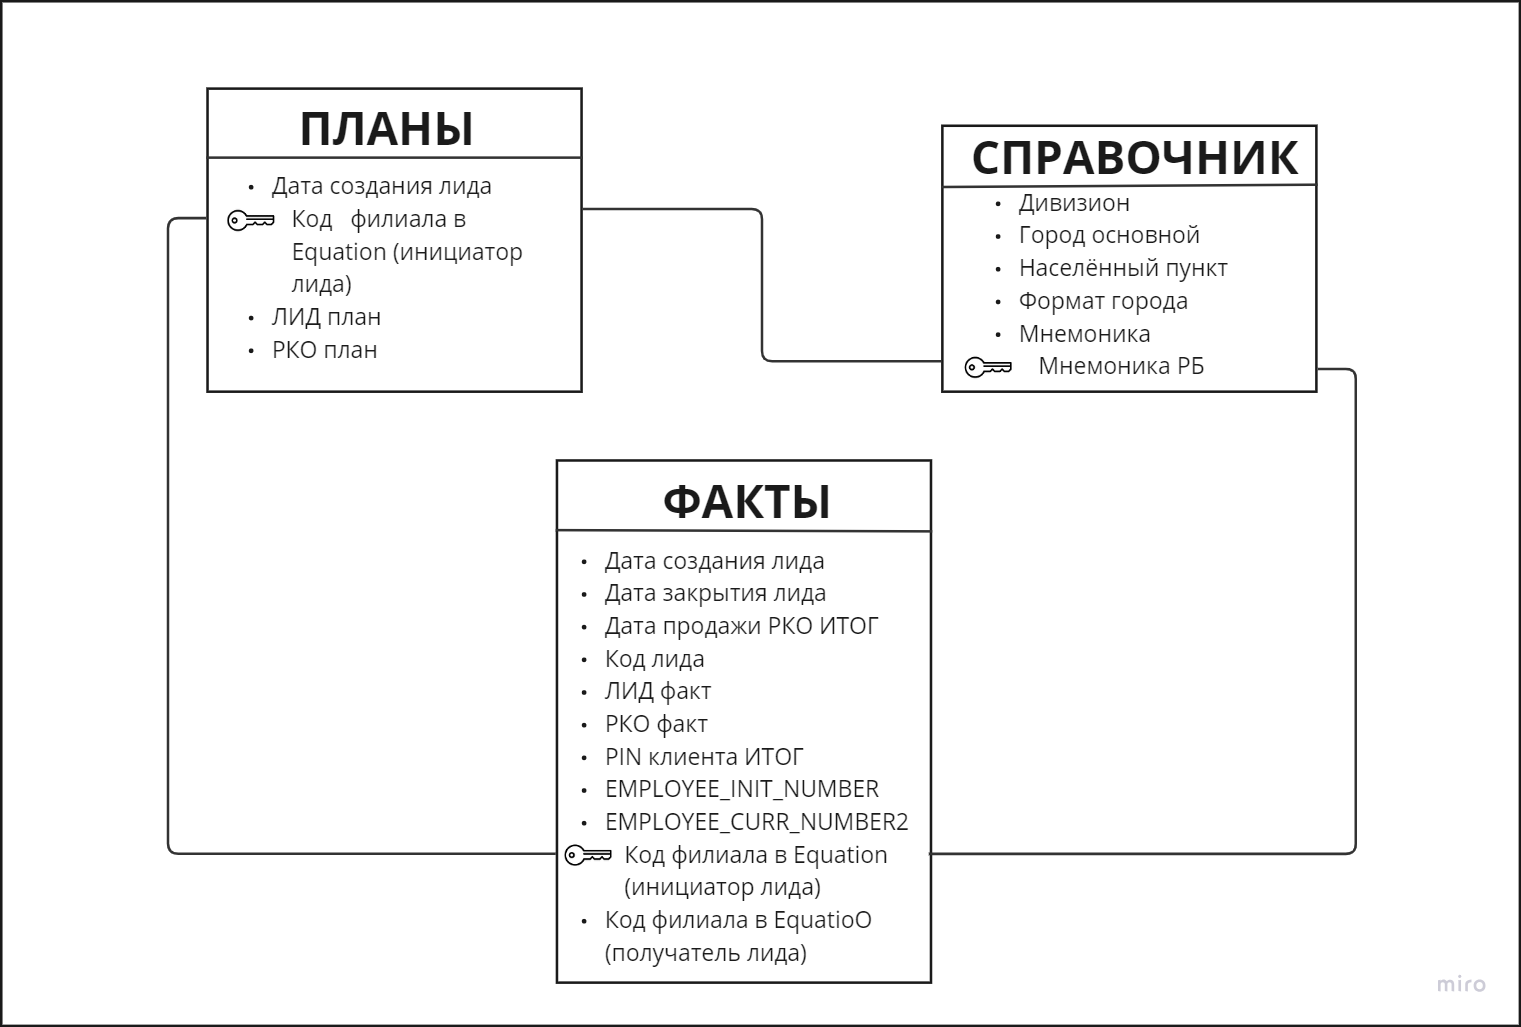

Можно заметить, что все три таблицы связаны между собой только Кодом филиала.

При внимательном рассмотрении возникает закономерный вопрос, почему же Планы и Факты не связаны датой создания лида? Судя по всему в планах указана лишь планируемая дата открытия, а фактах реально осуществлённая.

**Итак как были обработаны таблицы?**

Все таблицы были перенесены в одну, которая предстваляет собой три листа с соответствующими названиями.

В первую очередь требовалось исключить закрытые подраздления из таблиц Планы и Факты. Это было сделано следующим образом:


1.   В таблице Справочник колонка Мнемоника РБ (связующая с другими таблицами) путём переноса была сделана первой (самой левой) для корректной работы функции ВПР.
2.   В таблице Планы была написана функция ВПР вида:

  ```=ЕСЛИОШИБКА(ВПР(B2;Справочник!$A$2:$F$441;6;0);0)```
  
  Фунция возвращает значение Мнемоника, так как оно ставится в соответствие каждому значению Мнемоники РБ. Тогда при использовании фильтра можно найти нулевые строки в Планах и удалить их.

  Аналагичная работа была проделана и в Фактах.
3. В таблицу Планы были добавлены добавлены колонки Дивизион и Город основной.

  ```=ВПР(B2;Справочник!$A$2:$F$441;2;0)```

  ```=ВПР(B2;Справочник!$A$2:$F$441;3;0)```
4. Были сформированы сводные таблицы для Планов и Фактов. В качестве названий строк были выбрана кода филиатов, а ЛИД факты/PKO факты, ЛИД планы/PKO планы были просуммированы для каждого филиала.

  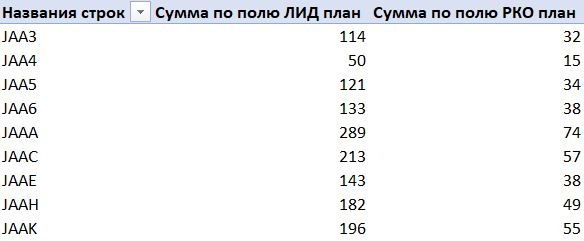

  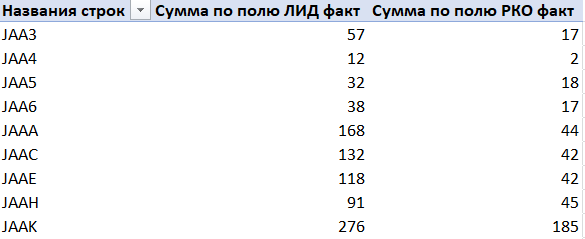

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_excel("/content/drive/MyDrive/data.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data.xlsx'

# Как выполняются планы на лиды и количество продаж от них по стране? Рассмотреть также в разрезе дивизионов.

Рассмотрим как выполняются планы в разрезе дивизионов.

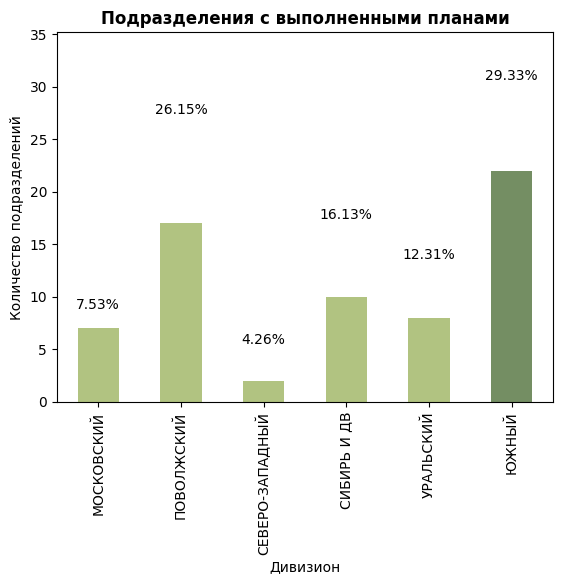

In [ ]:
df['Выполнение плана'] = np.logical_and(df['Сумма по полю РКО факт'] >= df['Сумма по полю РКО план'],
                                        df['Сумма по полю ЛИД факт'] >= df['Сумма по полю ЛИД план'])
good_plans_count = df[df['Выполнение плана']].groupby('Дивизион').size()
division_counts = df['Дивизион'].value_counts()

good_percent = (good_plans_count / division_counts) * 100

good_plans_count.plot(kind='bar', color = ['#B1C381', '#B1C381', '#B1C381', '#B1C381', '#B1C381', '#748E63'])
plt.xlabel('Дивизион')
plt.ylabel('Количество подразделений')
plt.title('Подразделения с выполненными планами', fontweight='bold')

for i, value in enumerate(good_percent):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.ylim(0, max(good_percent) * 1.2)

plt.show()

# Какое количество отделений справляется с этим показателем?

Отделение справляется с показателем, если фактическое исполнение превышает или равно запланированному.

Таким образом получилось, что:

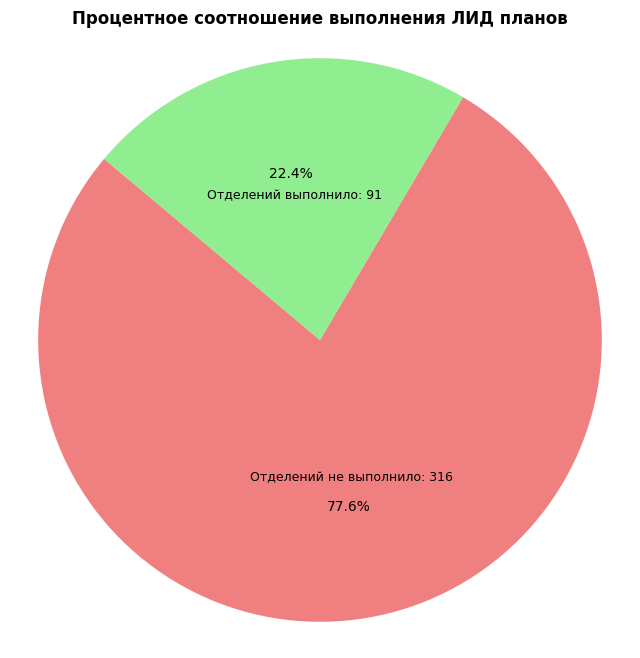

In [ ]:
df['Выполнение плана'] = df['Сумма по полю ЛИД факт'] >= df['Сумма по полю ЛИД план']

grouped = df.groupby('Выполнение плана').size()

plt.figure(figsize=(8, 8))
plt.pie(grouped, autopct='%1.1f%%', startangle=140, labeldistance=1.05 ,colors=['lightcoral', 'lightgreen'])
plt.title('Процентное соотношение выполнения ЛИД планов', fontweight='bold')
plt.axis('equal')
plt.text(-0.4, 0.5, f"Отделений выполнило: {grouped[1]}", fontsize=9, color='black')
plt.text(-0.25, -0.5, f"Отделений не выполнило: {grouped[0]}", fontsize=9, color='black')

plt.show()

С ЛИД планами справилось порядка 91 отделения, не справилось, соответственно, 316

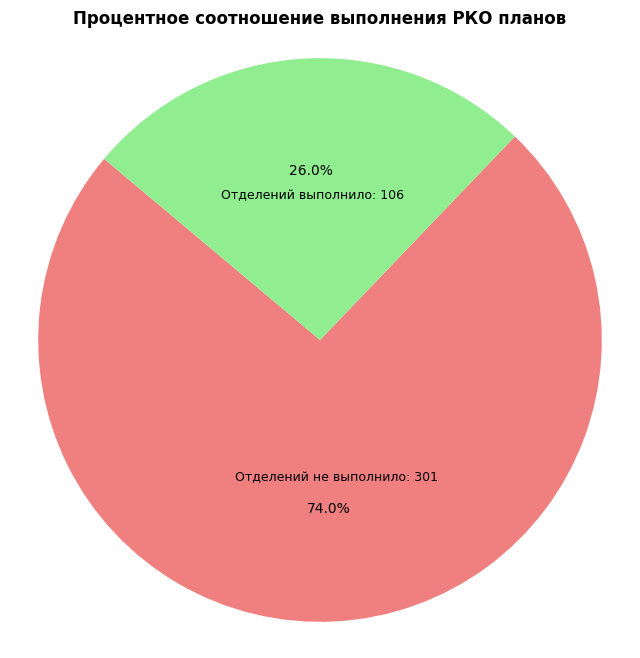

In [ ]:
df['Выполнение плана'] = df['Сумма по полю РКО факт'] >= df['Сумма по полю РКО план']

grouped = df.groupby('Выполнение плана').size()

plt.figure(figsize=(8, 8))
plt.pie(grouped, autopct='%1.1f%%', startangle=140, labeldistance=1.05 ,colors=['lightcoral', 'lightgreen'])
plt.title('Процентное соотношение выполнения РКО планов', fontweight='bold')
plt.axis('equal')
plt.text(-0.35, 0.5, f"Отделений выполнило: {grouped[1]}", fontsize=9, color='black')
plt.text(-0.3, -0.5, f"Отделений не выполнило: {grouped[0]}", fontsize=9, color='black')

plt.show()

С РКО планами справилось 106 отделений, не справилось 301.

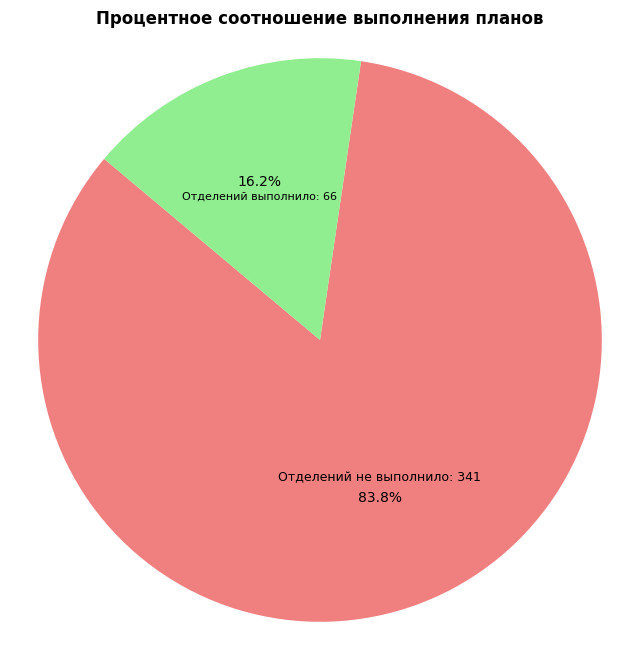

In [ ]:
df['Выполнение плана'] = np.logical_and(df['Сумма по полю РКО факт'] >= df['Сумма по полю РКО план'],
                                        df['Сумма по полю ЛИД факт'] >= df['Сумма по полю ЛИД план'])

grouped = df.groupby('Выполнение плана').size()

plt.figure(figsize=(8, 8))
plt.pie(grouped, autopct='%1.1f%%', startangle=140, labeldistance=1.05 ,colors=['lightcoral', 'lightgreen'])
plt.title('Процентное соотношение выполнения планов', fontweight='bold')
plt.axis('equal')
plt.text(-0.49, 0.5, f"Отделений выполнило: {grouped[1]}", fontsize=8, color='black')
plt.text(-0.15, -0.5, f"Отделений не выполнило: {grouped[0]}", fontsize=9, color='black')

plt.show()

Если рассмотреть количество отделений, выполнивших и план на лиды, и план на количество продаж от них, то оказывается, что таких отделений будет всего 66. В каких дивизионах будут эти отделения?

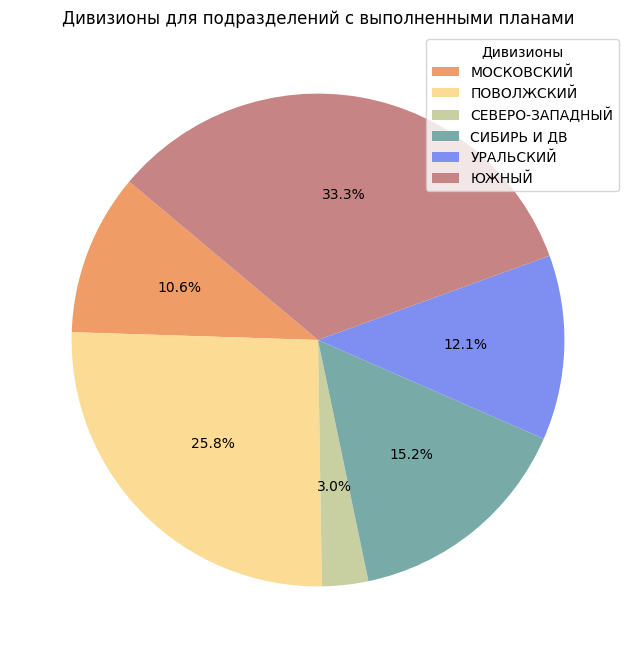

In [ ]:
completed_plans_count = df[df['Выполнение плана']].groupby('Дивизион').size()

plt.figure(figsize=(8, 8))
plt.pie(completed_plans_count, autopct='%1.1f%%', startangle=140, labeldistance=1.05, colors=['#EF9C66', '#FCDC94', '#C8CFA0', '#78ABA8', '#7E8EF1', '#C68484'])
plt.title('Дивизионы для подразделений с выполненными планами')
plt.legend(completed_plans_count.index, title='Дивизионы', loc='best')
plt.show()

Заметно, что их количество преобладает в Южном дивизионе. При этом нужно отметить, что всего уникальных дивизионов шесть:

  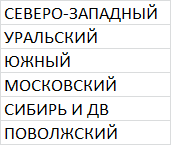

  То есть не существует такого дивизиона, в котором подразделение, выполнившее оба вида планов, отсутствует.

# Выделим регулярно западающие зоны

Рассмотрим все дивизионы и выясним, какой из них хуже всего справляется с выполнением планов.

Для начала взгляем на выполнение ЛИД планов.

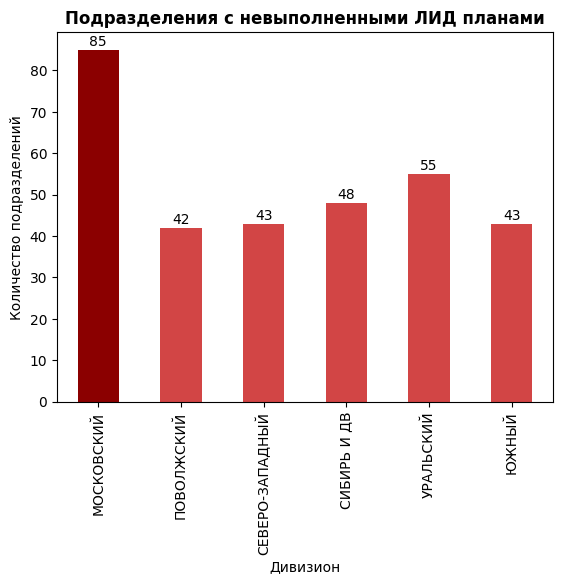

In [ ]:
df['Не выполнение плана'] = df['Сумма по полю ЛИД факт'] < df['Сумма по полю ЛИД план']
failed_plans_count = df[df['Не выполнение плана']].groupby('Дивизион').size()

failed_plans_count.plot(kind='bar', color = ['#8b0000', '#D24545', '#D24545', '#D24545', '#D24545', '#D24545'])
plt.xlabel('Дивизион')
plt.ylabel('Количество подразделений')
plt.title('Подразделения с невыполненными ЛИД планами', fontweight='bold')

for i in range(len(failed_plans_count)):
    plt.text(i, failed_plans_count[i] + 1, f'{failed_plans_count[i]}', ha='center')

plt.show()

Кажется, что в Московском дивизионе таких подразделений наибольшее количество, но если смотреть долю проблемных подразделений для каждого из дивизионов?

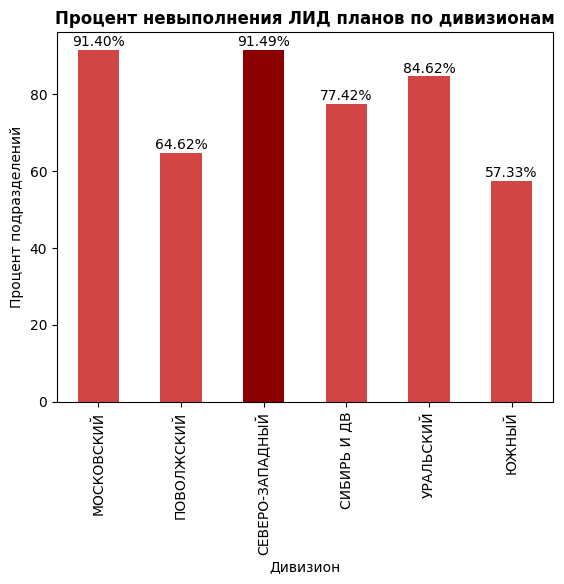

In [ ]:
division_counts = df['Дивизион'].value_counts()

failed_plans_count = df[df['Не выполнение плана']].groupby('Дивизион').size()

failure_percent = (failed_plans_count / division_counts) * 100

failure_percent.plot(kind='bar', color=['#D24545', '#D24545', '#8b0000', '#D24545', '#D24545', '#D24545'])
plt.xlabel('Дивизион')
plt.ylabel('Процент подразделений')
plt.title('Процент невыполнения ЛИД планов по дивизионам', fontweight='bold')

for i in range(len(failure_percent)):
    plt.text(i, failure_percent[i] + 1, f'{failure_percent[i]:.2f}%', ha='center')

plt.show()

Теперь видно, что доля "неуспешных" подразделений наиболее высока в Северо-западном дивизионе, а не в Московском, как это могло показаться на первый взгляд.

Взглянём на выполнение РКО планов.

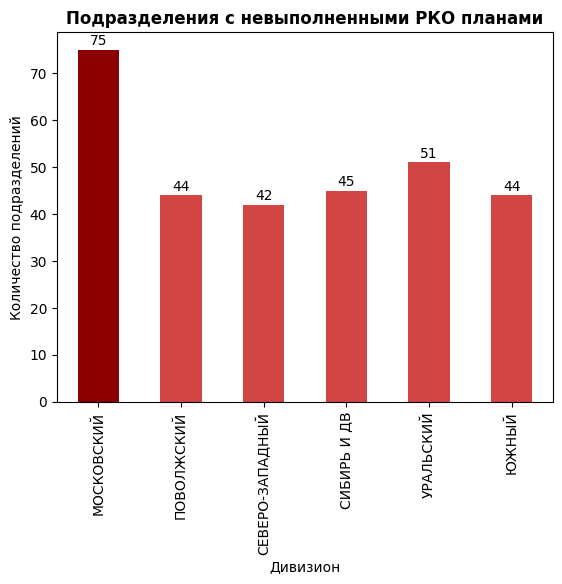

In [ ]:
df['Не выполнение плана'] = df['Сумма по полю РКО факт'] < df['Сумма по полю РКО план']
failed_plans_count = df[df['Не выполнение плана']].groupby('Дивизион').size()

failed_plans_count.plot(kind='bar', color = ['#8b0000', '#D24545', '#D24545', '#D24545', '#D24545', '#D24545'])
plt.xlabel('Дивизион')
plt.ylabel('Количество подразделений')
plt.title('Подразделения с невыполненными РКО планами', fontweight='bold')

for i in range(len(failed_plans_count)):
    plt.text(i, failed_plans_count[i] + 1, f'{failed_plans_count[i]}', ha='center')

plt.show()

Кажется, что опять лидирует Московский.

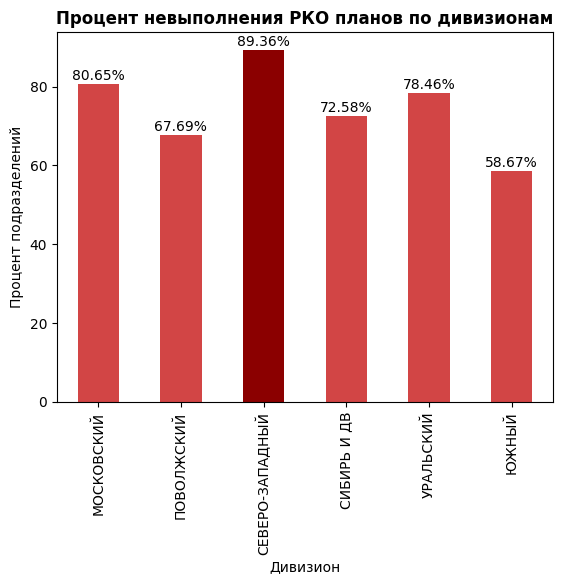

In [ ]:
division_counts = df['Дивизион'].value_counts()

failed_plans_count = df[df['Не выполнение плана']].groupby('Дивизион').size()

failure_percent = (failed_plans_count / division_counts) * 100

failure_percent.plot(kind='bar', color=['#D24545', '#D24545', '#8b0000', '#D24545', '#D24545', '#D24545'])
plt.xlabel('Дивизион')
plt.ylabel('Процент подразделений')
plt.title('Процент невыполнения РКО планов по дивизионам', fontweight='bold')

for i in range(len(failure_percent)):
    plt.text(i, failure_percent[i] + 1, f'{failure_percent[i]:.2f}%', ha='center')

plt.show()

При более точном рассмотрении сильно проигрывает Северо-Западный дивизион. Он отстаёт от других как минимум на 9 процентов и более.

Теперь рассмотрим суммарное невыполнение планов, то есть ситуацию, когда подразделение не выполняется как ЛИД план, так и РКО план.

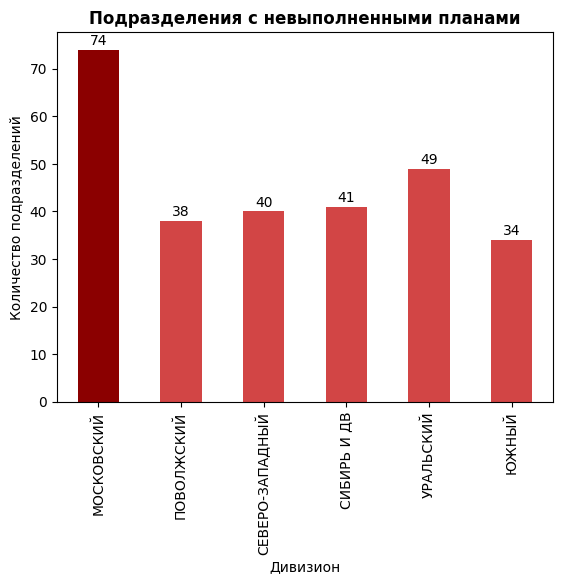

In [ ]:
df['Не выполнение плана'] = np.logical_and(df['Сумма по полю РКО факт'] < df['Сумма по полю РКО план'],
                                        df['Сумма по полю ЛИД факт'] < df['Сумма по полю ЛИД план'])
failed_plans_count = df[df['Не выполнение плана']].groupby('Дивизион').size()

failed_plans_count.plot(kind='bar', color = ['#8b0000', '#D24545', '#D24545', '#D24545', '#D24545', '#D24545'])
plt.xlabel('Дивизион')
plt.ylabel('Количество подразделений')
plt.title('Подразделения с невыполненными планами', fontweight='bold')

for i in range(len(failed_plans_count)):
    plt.text(i, failed_plans_count[i] + 1, f'{failed_plans_count[i]}', ha='center')

plt.show()

Лидирует Московский дивизион.

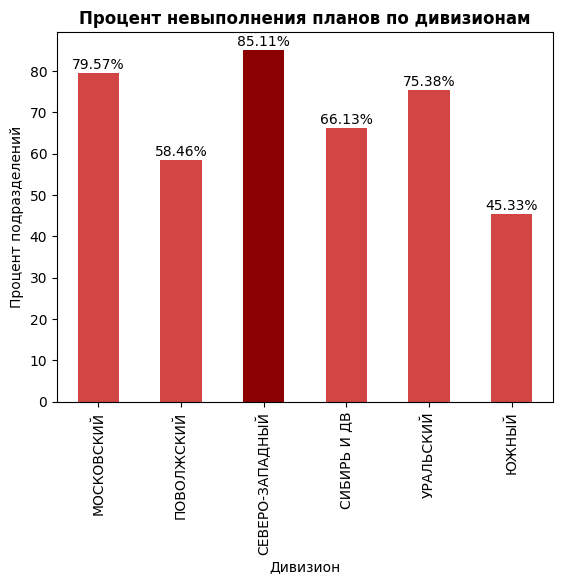

In [ ]:
division_counts = df['Дивизион'].value_counts()

failed_plans_count = df[df['Не выполнение плана']].groupby('Дивизион').size()

failure_percent = (failed_plans_count / division_counts) * 100

failure_percent.plot(kind='bar', color=['#D24545', '#D24545', '#8b0000', '#D24545', '#D24545', '#D24545'])
plt.xlabel('Дивизион')
plt.ylabel('Процент подразделений')
plt.title('Процент невыполнения планов по дивизионам', fontweight='bold')

for i in range(len(failure_percent)):
    plt.text(i, failure_percent[i] + 1, f'{failure_percent[i]:.2f}%', ha='center')

plt.show()

Логичным оказывает то, что Северо-Западный дивизион, занимая лидирующую позицию в процессе невыполнения обоих планов по отдельности, остаётся таковым и при общем подсчёте.

Московский дивизион постоянно занимает второе место в процентом оценивании и первое при общем количестве невыполнивших подразделений. Возможно причина в большом количестве подразделений в Московском дивизионе.

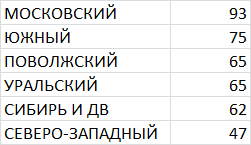

Действительно так и есть.

Южный регион имеет наименьший процент невыполнений.

# Определить, у кого можно получить лучшие практики по процессу

Скорее всего, имееется в виду тот дивизион, который лучше всех справляется с выполнением планов.

Как было выяснено выше, таким дивизионом является Южный. Рассмотрим его самого и принадлежащие ему подразделения поподробнее.

<ipython-input-161-164a593d5aa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_southern['Выполнение ЛИД плана'] = df_southern['Сумма по полю ЛИД факт'] >= df_southern['Сумма по полю ЛИД план']
<ipython-input-161-164a593d5aa5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_southern['Выполнение РКО плана'] = df_southern['Сумма по полю РКО факт'] >= df_southern['Сумма по полю РКО план']


<Figure size 1200x800 with 0 Axes>

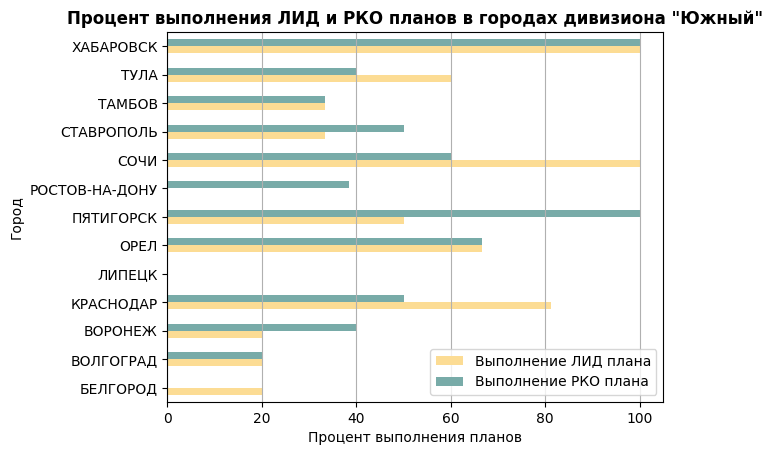

In [ ]:
df_southern = df[np.logical_and(df['Дивизион'] == 'ЮЖНЫЙ', (df['Город основной'] != 0))]

df_southern['Выполнение ЛИД плана'] = df_southern['Сумма по полю ЛИД факт'] >= df_southern['Сумма по полю ЛИД план']

luck_plans_count = df_southern[df_southern['Выполнение ЛИД плана']].groupby('Город основной').size()
town_counts = df_southern['Город основной'].value_counts()
luck_percent = (luck_plans_count / town_counts) * 100

df_southern['Выполнение РКО плана'] = df_southern['Сумма по полю РКО факт'] >= df_southern['Сумма по полю РКО план']

luck_plans_count = df_southern[df_southern['Выполнение РКО плана']].groupby('Город основной').size()
town_counts = df_southern['Город основной'].value_counts()
luck_percent = (luck_plans_count / town_counts) * 100


combined_data = pd.DataFrame({'Выполнение ЛИД плана': luck_percent_LID, 'Выполнение РКО плана': luck_percent_RKO})

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', color=['#FCDC94', '#78ABA8'])
plt.title('Процент выполнения ЛИД и РКО планов в городах дивизиона "Южный"', fontweight='bold')
plt.xlabel('Процент выполнения планов')
plt.ylabel('Город')
plt.grid(axis='x')
plt.show()

С ЛИД планами лучше всего справляются Сочи и Хабаровск, там стопроцентный результат.

С РКО планами успешней дела обстоят у Хабаровска и Пятигорска.

Рассмотрим теперь на общее выполнение двух видов планов.

<ipython-input-162-492bf5e9e45c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_southern['Выполнение плана'] = np.logical_and(df_southern['Сумма по полю РКО факт'] >= df_southern['Сумма по полю РКО план'], df_southern['Сумма по полю ЛИД факт'] >= df_southern['Сумма по полю ЛИД план'])


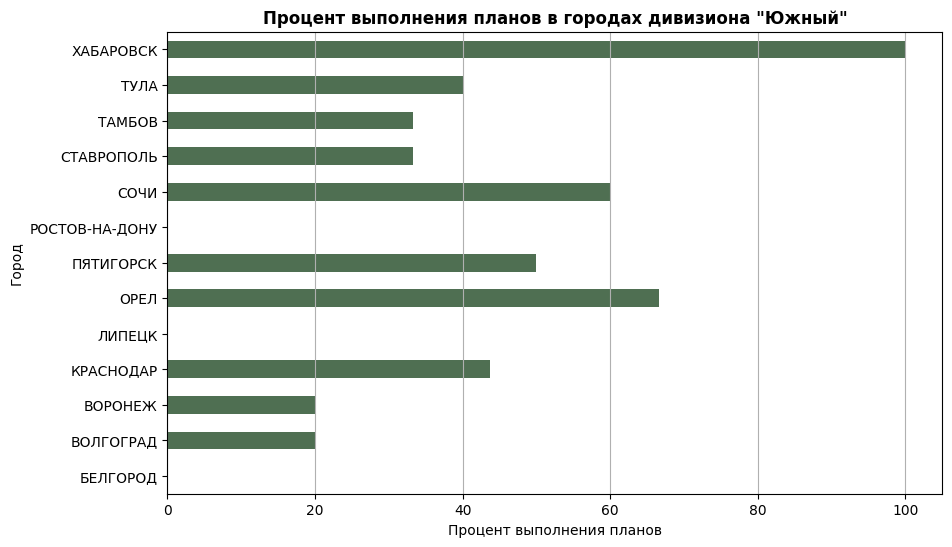

In [ ]:
df_southern = df[np.logical_and(df['Дивизион'] == 'ЮЖНЫЙ', (df['Город основной'] != 0))]
df_southern['Выполнение плана'] = np.logical_and(df_southern['Сумма по полю РКО факт'] >= df_southern['Сумма по полю РКО план'], df_southern['Сумма по полю ЛИД факт'] >= df_southern['Сумма по полю ЛИД план'])


luck_plans_count = df_southern[df_southern['Выполнение плана']].groupby('Город основной').size()
town_counts = df_southern['Город основной'].value_counts()
luck_percent = (luck_plans_count / town_counts) * 100

plt.figure(figsize=(10, 6))
luck_percent.plot(kind='barh', color='#4F6F52')
plt.title('Процент выполнения планов в городах дивизиона "Южный"', fontweight='bold')
plt.xlabel('Процент выполнения планов')
plt.ylabel('Город')
plt.grid(axis='x')

plt.show()

Хабаровск показывает идеальный результат. Рассмотрим его филиалы.

In [ ]:
df_best = df[np.logical_and(df['Город основной'] == 'ХАБАРОВСК', df['Дивизион'] == 'ЮЖНЫЙ')]
print(df_best['Названия строк'])

40    JAC9
Name: Названия строк, dtype: object


Итак в Хабаровске только один филиал, поэтому давайте рассмотрим его производительность поподробнее.

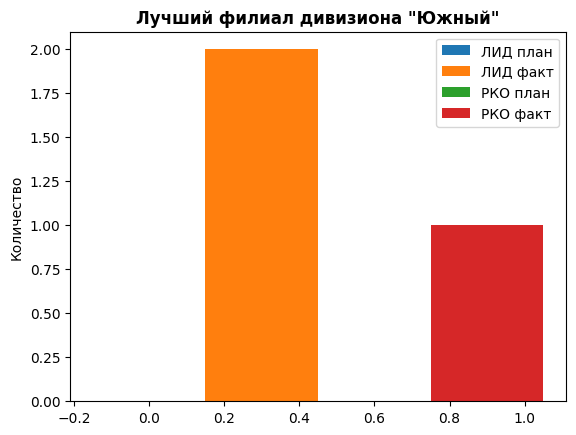

In [ ]:
lid_plan = df_best['Сумма по полю ЛИД план']
lid_fact = df_best['Сумма по полю ЛИД факт']
rko_plan = df_best['Сумма по полю РКО план']
rko_fact = df_best['Сумма по полю РКО факт']

bw = 0.3
index = np.arange(len(df_best))

plt.bar(index, lid_plan, bw, label='ЛИД план')
plt.bar(index + bw, lid_fact, bw, label='ЛИД факт')
plt.bar(index + 2 * bw, rko_plan, bw, label='РКО план')
plt.bar(index + 3 * bw, rko_fact, bw, label='РКО факт')

plt.ylabel('Количество')
plt.title('Лучший филиал дивизиона "Южный"', fontweight='bold')
plt.legend()

plt.show()

Видно, что при нулевых значениях планов присутствует фактические действия.